# CCfCS Deep Learning Workshop

In [2]:
import numpy as np, matplotlib.pyplot as plt, tensorflow as tf, tensorflow.keras as keras # Package imports 

2022-03-17 08:06:33.709656: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /alt/applic/spack/linux-ubuntu16.04-x86_64/gcc-7.2.0/miniconda3-4.8.2-iiyixgv4a7vez23nbdd2kgwrzfmm3wpp/lib
2022-03-17 08:06:33.709676: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## 1. Introdution and Dataset

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. 

As with the other machine learning methods mentioned earlier, a model must be trained on data, before the trained model can be used for inference on new data. Again, the data can come in both the form of labelled and unlabelled data for various supervised and unsupervised tasks.

To explore Deep Learning we will use the task of image classification. Here we will use a deep neural network to classify handwritten digits from the MNIST database which contains 60,000 images for training and 10,000 test images. First we will load our dataset.

### 1.1 Load MNIST Handwritten Digits Dataset

Here the inputs to the network are the N x N pixel images, with N=28, and the output layer consists of 10 neurons, each reprenting a value in the set of [0, 9]. Here a trained network should be able to take in an input image, process what within the image characterises the digit that is represents.

In [10]:
# import MNIST dataset
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Visualise subset of the dataset:

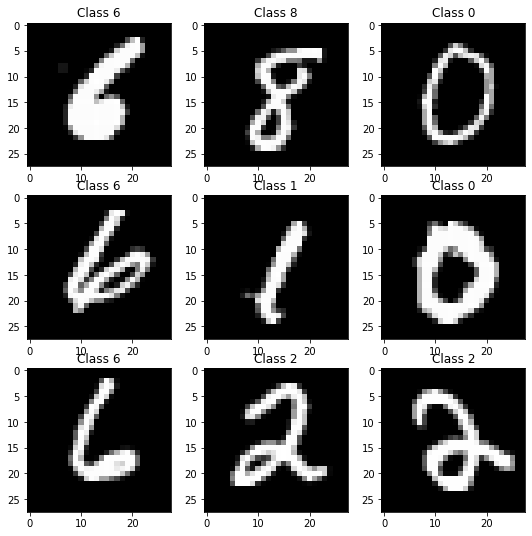

In [11]:
plt.figure(figsize=(9,9))

for i in range(9):
    plt.subplot(3,3,i+1)
    num = np.random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

Format Data for Machine Learning:

In [12]:
X_train = X_train.astype('float32')/255  # Normalising data and setting data type to float
X_test = X_test.astype('float32')/255    # Normalising data and setting data type to float

nb_classes = 10 # number of classes, representing the number of unquie digits

Y_train = keras.utils.to_categorical(y_train, nb_classes) 
Y_test = keras.utils.to_categorical(y_test, nb_classes)

## 2. Neural Networks

Basic network strucures have an input layer (shown in green below) of size corresponding to the "dimension" of the incoming data, and an outplut layer that is specific to the task (shown in red below). For a regression task this may be a single neuron, to give a single value, or for a classification task this would correspond to the number of classes.

What makes Neural Networks powerful, over the methods used earlier is their ability to have hidden layer between the input and output layers, and this ability to nest operations makes them able to capture more complex patterns in the data - these additional layers are referred to as 'Hidden Layers' (shown in purple below).

<img src="img/nn.png" alt="FFNN" width="800"/>

This image shows a feed forward neural network- named as such because nothing particualrly special is taking place, the outputs of one layer, become the inputs to the next layer, and thus the information is fed forward through the network from the input layer to the output layer. This strucure is supposed to be loosely based on biological structures, such as the brain, where information from one neuron firing causes other neurons to fire.

For the first part of this tutorial we will use a Feed Forward Neural Network, however there are other network architectures that are used for various tasks, namely:

- Convolutional Neural Network - for Image Processing,
- Recurrent Neural Networks - for Time Series Data,
- Graph Neural Network - for processing data best represented by graph data structures.

However, there are variations of each of these, and developing new archictures is a very active research field.

### 2.1 Feature recognition

Much like a human would, the goal of the network is to learn features within the input data that would inform what the output should be. In order to identifiy a '9', for example, a human may first identify the loop at the top (shown in red below), and secondarily the line that comes down from that loop (shown in green below). Of course when also shown another image of a 9, a human can still indentify that the image is indeed of a 9, eventhough the image is not quite the same as the fist, where the loop is different and the line is now curved. When training out network, we hope that it too would be invarient to these small differences and would not classify based on exact locations of pixels within the image domian, but use structres, or features, within the image that are learnt to corespond to the image label.

<img src="img/9.jpeg" alt="9" width="400"/>

This is where the notion of layers comes in, as the network will look to break down the input into into layers of abstraction. While the network may not nessarilty use one layer to identify edges and another to piece together those edges to regonise shapes, each layer will looks to extract featuers from the input data, and then determine the prevelenace of these features when returning an output. This idea of abstracting away features of the input data is not specific to images and could for example be  applied to a time series corresponding to speech, where raw audo must be broken down into district sounds that together form syllables which in turn form words.

### 2.2 Weights and Biases

As discussed, the network will attempt to extract features from the training dataset, and determine their prevelence when given an input. The prevelence here is given by a weight value. Within a FNN the nodes in each layer are connected to every node in the following layer. These connections are weighted and these weights are the parameters that the network looks looks to optimise during the learning stage. The other parameters that the network looks to determine are the biases and these are the constants that shift the output of a neuron, equivilant to the y-intercept of a linear fit.

A single layer can be defined as the following: $y = σ(W^Tx + b)$,
where σ is the activation function, W is a $n$ x $m$ matrix containing our weights, x is our input vector of size $m$ and b is the bias vector, and $n$ is the number of neurons in the layer. To build up the network structure, this is then used as the input for the next layer, for example: $y_2 = σ_2(W_2^Ty + b_2) = σ_2(W_2^Tσ_1(W_1^Tx + b_1) + b_2)$, and so on.

One way of visualising the operations of a neural network is to see it as simply a transformation or a function, that takes an input space and outputs the corresponding mapping.

Here we will define a simple FFNN, with two hidden layers. The size of these layers corresponds to their width, and these are hyperparamets that will need to be explored and adjusted. The inut layer size corresponds to the size of each input image, and the size of the final output layer corresponds to the number of classes for our prediction, in this case 10. We can print the model structure and take a look at the number of tranable parameters in each of the layers.

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28, 1]),
    tf.keras.layers.Dense(200,),
    tf.keras.layers.Dense(60, ),
    tf.keras.layers.Dense(10,)]) # classifying into 10 classes

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 200)               157000    
                                                                 
 dense_13 (Dense)            (None, 60)                12060     
                                                                 
 dense_14 (Dense)            (None, 10)                610       
                                                                 
Total params: 169,670
Trainable params: 169,670
Non-trainable params: 0
_________________________________________________________________
None


### 2.3 Activation Functions



<img src="img/activation.png" alt="9" width="900"/>

Defined previously in 2.2. as $\sigma$, the activation function is applied to the output of our neuron.

Activation functions include:

- Step Fucntion:
- Linear:
- Sigmoid
- Tanh
- ReLU

We will now add activation functions to our model:

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28, 1]),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(60, activation="relu"),
    tf.keras.layers.Dense(10, activation='sigmoid')]) # classifying into 10 classes

### 2.4 Cost function

In this case of supervised learning, for each training pass, the output for each neron in each consecutative layer is computed (this a forward pass, as would take place when making predictions). The network's output error is then then measured by comparing this output of this to the desired output provided by the training data and it computes how much each neuron in the previous layer contributed to each output neuron's error, before measuring how much these error contributions came from the previous layer and so on. This reverse pass efficiently measures the error gradiant across all the connection weights in the network bt propogating the error gradient backward in the netork and hence the algotrthm is known as backpropogation.

How these differences between output and desired output are measured is determined by the choice of cost function. As with most methods of machine learning, the choice of cost function is often determined by the type of data as well as the desired tasks.
- Regression Tasks: The most common loss function used here is Mean Squared Error (MSE), also known as L2 loss. This is measured as the average of the sum of squared differences between predictions and actual observations: $ C = \frac{1}{n}\Sigma_{i} (y_i - \sigma(Wx_i + b))^2$
- Classifcation Tasks: Cross entropy loss

Of course there are many other cost functions that could be used, and often some experimnetion is required to find the optimal function for each dataset and ML task, but they all essnetially all of them essentially penalize the distance between the predicted y-value and the actual value of Y.

### 2.5 Gradient Descent

The optimal parameters of the network will correpsond to minimisation of the cost function - the errors between the predictions and the truth values will be their lowest. Due to the high parameter space, the cost function is very high-dimetnional and grid-searching this space would be exhasutive, and thus an algorithm must be used to try and find this global minima in a more effiecnt manner. It is hard to visualise a high-dimentional cost surface, so the image below shows a cost surface for two parameters.

<img src="img/gradient_descent.jpg" alt="9" width="600"/>

Our intial parameters are randomly initialised (shown as the black circle), and the network will try to find the cost function's global minima. The most common algorithm to find this is Backpropgation. As it would be far too expensive to determine the cost surface across all parameter space, the gradient is computed locally for each parameter set, and the network will move along this gradient and update the model parameters accordingly, in a process known as gradient descent. How far along this gradient the model moves is determined by the Learning rate, which is a hyperparameter that can be altered, however many frameworks have automatic methods for determining this rate. For our cost function $C$ , our grdaient is defined as $ \nabla C(W) $ and we can represent the update step as $ W:= W - \alpha \nabla C(W)$ where $\alpha$ is the learning rate.

This method of gradient descent will, however, only be able to find local minima, as it is only ever computing the local gradient, and thus may not covnerge on the optimal set of parameters. To overcome this a modified version of gradient descent called stochastic gradient descent can be used. With SGD, we shuffle our dataset, and then go through each sample individually, calculating the gradient with respect to that single point, and performing a weight update for each. This may seem like a bad idea at first because a single example may be an outlier and not necessarily give a good approximation of the actual gradient. But it turns out that if we do this for each sample of our dataset in some random order, the overall fluctuations of the gradient update path will average out and converge towards a good solution. Moreover, SGD helps us get out of local minima and saddle points by making the updates more “jerky” and erratic, which can be enough to get unstuck if we find ourselves in the bottom of a valley.

There are many different algorithms for implementing gradient descent, the one we will use is the 'Adam' optimiser, which is an adaptive method that combines stochastic with momentum and RMSProp. 
- Momentum: Instead of using only the gradient of the current step to guide the search, momentum also accumulates the gradient of the past steps to determine the direction to go, allowing the search to build inertia in a direction in the search space and overcome the oscillations of noisy gradients and coast across flat spots of the search space 
- RMSProp (Root Mean Squared Propagation): here the step size in each dimension used by the optimization algorithm to be automatically adapted based on the gradients seen for the variable (partial derivatives) over the course of the search. In addtion a decaying average of partial gradients in the adaptation of the step size for each parameter is used. The use of a decaying moving average allows the algorithm to forget early gradients and focus on the most recently observed partial gradients seen during the progress of the search,

In [19]:
# this configures the training of the model. Keras calls it "compiling" the model.
model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy']) # % of correct answers

### 2.6 Train Model

In practice, when using the gradient descent methods discussed above it is usual to use what is called mini-batch gradient descent, in which the whole dataset is randomly subdivided into N equally-sized mini-batches of K samples each. Here  the gradient is smoother and more stable than SGD, and reasonably similar to the full gradient, but we have a massive speed-up from not having to evaluate every sample in the dataset for each update. It also provides the opportunity for parallelisation, which can massively speed up compute, partularly on matrix multiplation optimised hardware such as GPUs.

An epoch in machine learning means one complete pass of the training dataset through the algorithm. This epochs number is an important hyperparameter for the algorithm. It specifies the number of epochs or complete passes of the entire training dataset passing through the training or learning process of the algorithm. With each epoch, the dataset’s internal model parameters are updated. There is no guarantee a network will converge by letting it learn the data for multiple epochs and thus some experimentation with this hyperparetmers is required.

In [20]:
model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_split = 0.05)

Epoch 1/5


2022-03-16 22:30:32.902365: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 178752000 exceeds 10% of free system memory.


446/446 [==============================] - 1s 2ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0810 - val_accuracy: 0.9790
Epoch 2/5
446/446 [==============================] - 1s 2ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0634 - val_accuracy: 0.9807
Epoch 3/5
446/446 [==============================] - 1s 2ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.0649 - val_accuracy: 0.9847
Epoch 4/5
446/446 [==============================] - 1s 2ms/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.0695 - val_accuracy: 0.9837
Epoch 5/5
446/446 [==============================] - 1s 2ms/step - loss: 0.0135 - accuracy: 0.9960 - val_loss: 0.0821 - val_accuracy: 0.9823


## 3. Evaluation

 Once our model has been trained, we wish to evaluate it on our unseen data to see how it performs. The class that the model assigns the greatest value to (one can infer that this is the class the model is most confident in predicting) is the class that the is used to check against the actual labels. Lets see how it performed:

In [21]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 699us/step - loss: 0.0740 - accuracy: 0.9803
[0.07397129386663437, 0.9803000092506409]
Test score: 0.07397129386663437
Test accuracy: 0.9803000092506409


The models seems to have performed very well, the test accuracy indicates that the model is very good at this classifcation task. We can verify the results by plotting the images for a set that the model supposesdly guessed correctly:

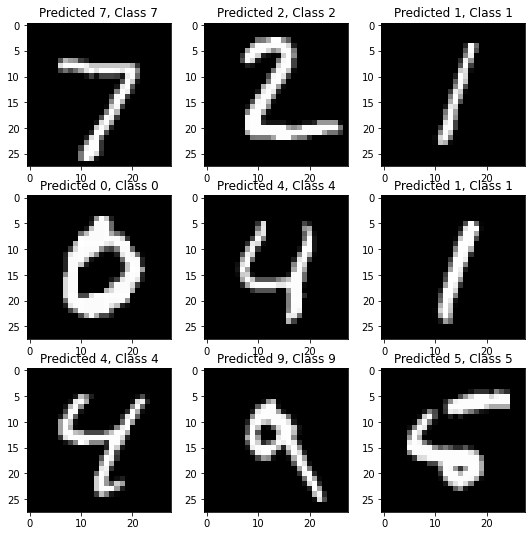

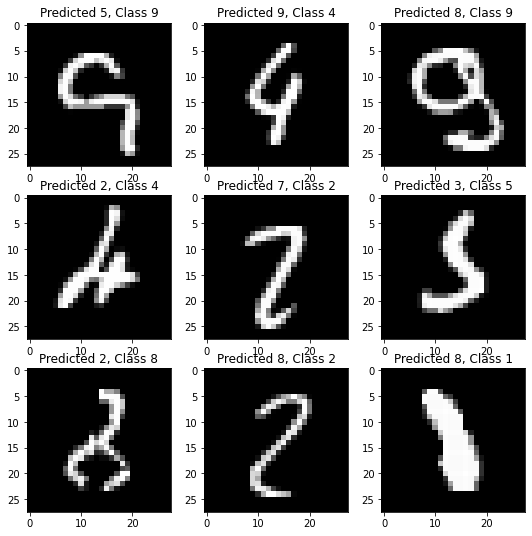

In [22]:
# The predict_classes function outputs the highest probability class according to the trained classifier for each input example.
predicted_classes = model.predict(X_test)

# Check which items we got right / wrong
correct_indices, incorrect_indices = [], []
for index, prediction_array in enumerate(predicted_classes):
    prediction = np.argmax(prediction_array)  #use the largest value of the array as the network's prediction
    Y_label    = np.argmax(Y_test[index])     #use the largest value of the array as the truth label
    if prediction == Y_label:   correct_indices.append(index)
    else:                     incorrect_indices.append(index)

plt.figure(figsize=(9,9))   
for index, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,index+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(np.argmax(predicted_classes[correct]), y_test[correct]))
plt.show()

As well as a set that the model guessed incorrectly. As can be seen some here would be considered greater mistakes than others:

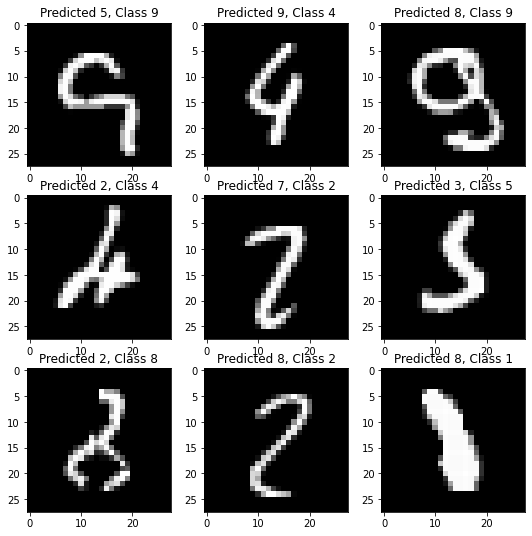

In [43]:
plt.figure(figsize=(9,9))
for index, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,index+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(np.argmax(predicted_classes[incorrect]), y_test[incorrect]))
plt.show()

### 3.1 Experimentation

- How does increasing the batch size to 10,000 affect the training time and test accuracy?

In [23]:
model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_split = 0.05)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
103/446 [=====>........................] - ETA: 0s - loss: 0.0156 - accuracy: 0.9954

2022-03-16 22:31:02.204830: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 178752000 exceeds 10% of free system memory.


446/446 [==============================] - 1s 2ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0920 - val_accuracy: 0.9803
Epoch 2/5
446/446 [==============================] - 1s 2ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0905 - val_accuracy: 0.9807
Epoch 3/5
446/446 [==============================] - 1s 2ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.0863 - val_accuracy: 0.9803
Epoch 4/5
446/446 [==============================] - 1s 2ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0862 - val_accuracy: 0.9823
Epoch 5/5
313/313 [==============================] - 0s 695us/step - loss: 0.0840 - accuracy: 0.9794
Test score: 0.08397500216960907
Test accuracy: 0.9793999791145325


- How does making our network wider or deeper effect our model results?

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28, 1]),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(60, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_split = 0.05)

score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5


2022-03-16 22:31:11.521064: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 178752000 exceeds 10% of free system memory.


446/446 [==============================] - 1s 2ms/step - loss: 0.3147 - accuracy: 0.9107 - val_loss: 0.1132 - val_accuracy: 0.9700
Epoch 2/5
446/446 [==============================] - 1s 2ms/step - loss: 0.1243 - accuracy: 0.9627 - val_loss: 0.0859 - val_accuracy: 0.9773
Epoch 3/5
446/446 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9749 - val_loss: 0.0767 - val_accuracy: 0.9807
Epoch 4/5
446/446 [==============================] - 1s 2ms/step - loss: 0.0599 - accuracy: 0.9822 - val_loss: 0.0704 - val_accuracy: 0.9810
Epoch 5/5
313/313 [==============================] - 0s 696us/step - loss: 0.0760 - accuracy: 0.9759
Test score: 0.07604043185710907
Test accuracy: 0.9758999943733215


### 3.2 Overfitting

Plot training curves

Epoch 1/5
446/446 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.1282 - val_accuracy: 0.9837
Epoch 2/5
446/446 [==============================] - 1s 2ms/step - loss: 0.0171 - accuracy: 0.9953 - val_loss: 0.1277 - val_accuracy: 0.9830
Epoch 3/5
446/446 [==============================] - 1s 2ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.1145 - val_accuracy: 0.9830
Epoch 4/5
446/446 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.1093 - val_accuracy: 0.9857
Epoch 5/5
446/446 [==============================] - 1s 2ms/step - loss: 7.6701e-04 - accuracy: 0.9998 - val_loss: 0.1153 - val_accuracy: 0.9847


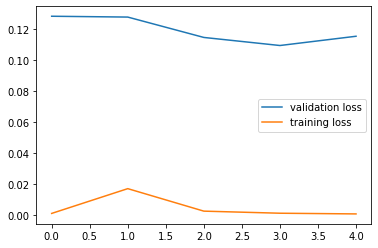

In [32]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_split = 0.05)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

Here we can see both that our network does not continue to learn with inceasing epochs, but also that the loss values over the training set are much smaller than that of our validation set. This indicates that the model does not perform as well on data that is has not see before, and thus has overfit to the space of the training data. Overfitting describes the situation in which your model is over-optimized to accurately predict the training set, at the expense of generalizing to unseen data (which is the objective of learning in the first place).

There are a number of regularisation methods that can be used to try and avoid overfitting, so that our model generalises and performs as well on unseen data. Regularization refers to imposing constraints on our neural network in order to prevent overfitting or otherwise discourage undesirable properties. One way overfitting occurs is when the magnitude of the weights grows too large; it is this property that allows the shape of the network output function to curve so wildly as to capture the underlying noise of a training set.

One way to regularize is to modify our objective function by adding an additional term which penalizes large weights. Denoting our neural network as $f, we can penalise large weights by appending our loss function with the L2-regularization term, denoted here as $R(f)$: $R(f)=\frac{1}{2} \lambda \sum w^2 $.

This term is simply the sum of the squares of all of the weights, multiplied by a new hyperparameter $\lambda$ which controls the overall magnitude (and therefore influence) of the regularization term. The $\frac{1}{2}$ multiplier is simply used for convenience when taking its derivative. Adding it to our original loss function, we now have: $C_{reg}= C + R(f)$. The effect of this regularization term is is that we help gradient descent find a parameterization which does not accumulate large weights and have such wild swings as we saw above.

#### Dropout

Another regularisation technique is dropout, where during training, when dropout is applied to a layer, some percentage of its neurons (a hyperparameter) are randomly deactivated or “dropped out,” along with their connections. Which neurons are dropped out are constantly shuffled randomly during training. This is to reduce over reliance on particular neurons, as they may not be there during a particular training pass, forcing the network to learn a more balanced representation.

<img src="img/dropout.png" alt="FFNN" width="600"/>

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28, 1]),
    tf.keras.layers.Dense(200, activation="relu", kernel_regularizer='l2'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(60, activation="relu", kernel_regularizer='l2'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split = 0.05)



Epoch 1/50
446/446 [==============================] - 1s 2ms/step - loss: 1.2548 - accuracy: 0.8642 - val_loss: 0.5519 - val_accuracy: 0.9390
Epoch 2/50
446/446 [==============================] - 1s 2ms/step - loss: 0.6005 - accuracy: 0.9085 - val_loss: 0.4599 - val_accuracy: 0.9497
Epoch 3/50
446/446 [==============================] - 1s 2ms/step - loss: 0.5375 - accuracy: 0.9184 - val_loss: 0.4248 - val_accuracy: 0.9557
Epoch 4/50
446/446 [==============================] - 1s 2ms/step - loss: 0.4997 - accuracy: 0.9256 - val_loss: 0.4027 - val_accuracy: 0.9553
Epoch 5/50
446/446 [==============================] - 1s 2ms/step - loss: 0.4741 - accuracy: 0.9290 - val_loss: 0.3757 - val_accuracy: 0.9603
Epoch 6/50
446/446 [==============================] - 1s 2ms/step - loss: 0.4511 - accuracy: 0.9326 - val_loss: 0.3525 - val_accuracy: 0.9670
Epoch 7/50
446/446 [==============================] - 1s 2ms/step - loss: 0.4344 - accuracy: 0.9343 - val_loss: 0.3473 - val_accuracy: 0.9657
Epoch 

313/313 [==============================] - 0s 733us/step - loss: 0.2369 - accuracy: 0.9686
Test score: 0.23685938119888306
Test accuracy: 0.9685999751091003


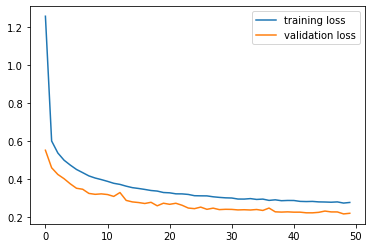

In [42]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

## 4. Convolutional Neural Networks